In [4]:
!pip install tensorflow keras matplotlib


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from zipfile import ZipFile

# Binary Dataset
file_name = "/content/drive/MyDrive/ONE_VS_OTHERS.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall('/content/')
    print("Binary Dataset Extracted")

# Multiclass Dataset
file_name = "/content/drive/MyDrive/ONE_VS_MULTICLASS.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall('/content/')
    print("Multiclass Dataset Extracted")


Binary Dataset Extracted
Multiclass Dataset Extracted


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_dataset = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/ONE_VS_OTHERS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = test_dataset.flow_from_directory(
    '/content/ONE_VS_MULTICLASS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 6505 images belonging to 2 classes.
Found 22566 images belonging to 80 classes.


In [9]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model1.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5262 - loss: 2.9380 - val_accuracy: 0.0000e+00 - val_loss: -5.6779
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.5692 - loss: 0.6795 - val_accuracy: 0.0312 - val_loss: -4.4699
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 719ms/step - accuracy: 0.5196 - loss: 0.7085 - val_accuracy: 0.0312 - val_loss: -9.3058
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 640ms/step - accuracy: 0.5698 - loss: 0.6879 - val_accuracy: 0.0000e+00 - val_loss: -1.6994
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 715ms/step - accuracy: 0.5374 - loss: 0.7023 - val_accuracy: 0.0000e+00 - val_loss: -7.2096
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 624ms/step - accuracy: 0.5475 - loss: 0.6833 - val_accuracy: 0.0000e+00 - val_loss: -1.9722
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.5594 - loss: 0.6883 - val_accuracy: 0.0000e+00 - val_loss: -1.8305
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 595ms/step - accuracy: 0.5950 - loss: 0.6818 - va

In [11]:
from keras.preprocessing import image
def ImagePrediction1(FilePath):
    img = image.load_img(FilePath, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    ypred = model1.predict(img)
    return ypred

def Conclusion1(ypred):
    if ypred[0][0] > 0.5:
        print("Mammal")
    else:
        print("Other Animal")


In [12]:
train_generator = train_datagen.flow_from_directory(
    '/content/ONE_VS_OTHERS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_dataset.flow_from_directory(
    '/content/ONE_VS_OTHERS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 6505 images belonging to 2 classes.
Found 6505 images belonging to 2 classes.


In [13]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(80, activation='softmax'))  # Changed to 80 classes

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_dataset = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator2 = train_datagen.flow_from_directory(
    '/content/ONE_VS_MULTICLASS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator2 = test_dataset.flow_from_directory(
    '/content/ONE_VS_MULTICLASS',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 22566 images belonging to 80 classes.
Found 22566 images belonging to 80 classes.


In [16]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model2.add(Dense(80, activation='softmax'))

In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator2.classes),
    y=train_generator2.classes
)

class_weights_dict = dict(enumerate(class_weights))


In [19]:
history2 = model2.fit(
    train_generator2,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator2,
    validation_steps=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 967ms/step - accuracy: 0.0085 - loss: 4.3857 - val_accuracy: 0.0625 - val_loss: 4.3401
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.0139 - loss: 4.3700 - val_accuracy: 0.0000e+00 - val_loss: 4.3476
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 671ms/step - accuracy: 0.0369 - loss: 4.3598 - val_accuracy: 0.0000e+00 - val_loss: 4.3583
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 668ms/step - accuracy: 0.0136 - loss: 4.3491 - val_accuracy: 0.0000e+00 - val_loss: 4.3505
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 703ms/step - accuracy: 0.0219 - loss: 4.3443 - val_accuracy: 0.1562 - val_loss: 4.2939
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 632ms/step - accuracy: 0.0614 - loss: 4.3322 - val_accuracy: 0.0312 - val_loss: 4.3678
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 699ms/step - accuracy: 0.0622 - loss: 4.3205 - val_accuracy: 0.0938 - val_loss: 4.2987
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.0500 - loss: 4.3208 - val_accuracy: 

In [20]:
def predict_animal_category(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Broad category prediction
    ypred1 = model1.predict(img)
    if ypred1[0][0] < 0.5:
        print("Category: Mammal")
        category = 'Mammal'
    else:
        print("Category: Bird")
        category = 'Bird'

    # Specific species prediction
    ypred2 = model2.predict(img)
    species = np.argmax(ypred2)

    species_dict = {0: 'Bat', 1: 'Caterpillar', 2: 'Jellyfish', 3: 'Sparrow', 4: 'Zebra', 5: 'Other'}
    print(f"Species: {species_dict[species]}")

    return category, species_dict[species]

In [21]:
def predict_animal_category(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Broad category prediction (Use model1 directly here)
    ypred1 = model1.predict(img)
    if ypred1[0][0] < 0.5:
        print("Category: Mammal")
        category = 'Mammal'
    else:
        print("Category: Bird")
        category = 'Bird'

    # Specific species prediction (Using model2)
    ypred2 = model2.predict(img)
    species = np.argmax(ypred2)

    # Define species dictionary (update with correct species)
    species_dict = {0: 'Bat', 1: 'Caterpillar', 2: 'Jellyfish', 3: 'Sparrow', 4: 'Zebra', 5: 'Other'}
    print(f"Species: {species_dict.get(species, 'Unknown Species')}")

    return category, species_dict.get(species, 'Unknown Species')


In [30]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_animal_category(img_path):
    # Load and preprocess image (same as before)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # --- Specific Species Prediction ---
    ypred2 = model2.predict(img)
    probabilities = ypred2[0]
    species_index = np.argmax(probabilities)
    confidence = probabilities[species_index]

    # Species Dictionary
    species_dict = {0: 'Bat', 1: 'Caterpillar', 2: 'Jellyfish', 3: 'Sparrow', 4: 'Zebra', 5: 'Other'}

    predicted_species = species_dict.get(species_index, 'Unknown Species')

    # --- Broad Category Prediction Based on Species ---
    if predicted_species in ['Bat', 'Caterpillar', 'Jellyfish', 'Zebra']:  # Update with mammal species
        category = 'Mammal'
    else:
        category = 'others'  # Assuming everything else is a bird for this example

    # Print results
    print(f"Category: {category}")
    print(f"Species: {predicted_species}")
    return category, predicted_species

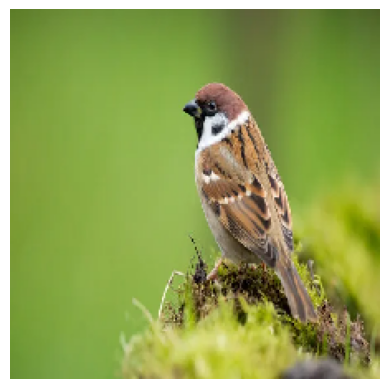

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Category: others
Species: Sparrow


('others', 'Sparrow')

In [31]:
predict_animal_category('/content/image_for_ML.webp')
